##Assignment 2 - Data Version control(MDS202414)

###Loading raw data

In [1]:
import pandas as pd

In [2]:

file_path = 'SMSSpamCollection'
def load_data(file_path):
  try:
      with open(file_path, 'r') as file:
          content = file.read()
      print(content[:1000])
  except FileNotFoundError:
      print(f"Error: The file '{file_path}' was not found.")
  except Exception as e:
      print(f"An error occurred: {e}")
  return content

content = load_data(file_path)

ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
ham	Ok lar... Joking wif u oni...
spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
ham	U dun say so early hor... U c already then say...
ham	Nah I don't think he goes to usf, he lives around here though
spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
ham	Even my brother is not like to speak with me. They treat me like aids patent.
ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
spam	H

In [3]:
#creating dataframe with label and text columns
rows = content.split("\n")
df = pd.DataFrame([msg.split("\t") for msg in rows],columns=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


###Data tranformation

In [4]:
import pandas as pd
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Ensure necessary NLTK data is downloaded (run once)
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:

# Text Preprocessing Function
def process_text(text):
    """
    Removes punctuation and stopwords, and returns a list of clean words.
    """
    if text is None:
        return []
    # Remove punctuation

    # for char in text:
    #   if char not in string.punctuation:
    #     print(char)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # Remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_words



In [6]:
# Vectorization (Feature Extraction)
# Convert a collection of text documents to a matrix of token counts
# Analyzer uses the custom process_text function
vectorizer = CountVectorizer(analyzer=process_text)
vectorized_text = vectorizer.fit_transform(df['text'].tolist())


In [7]:
df = pd.concat([df,pd.DataFrame(vectorized_text.toarray().tolist())],axis=1)
df.shape

(5575, 11427)

In [8]:
df=df.drop("text",axis=1)

###First version of split (seed=42)

In [ ]:
random_state=42

# Split the data into 70% training and 30% temp (validation + test)
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=random_state)

# Split the 30% temp data into 15% validation and 15% test
# test_size=0.5 means half of df_temp goes to validation and half to test
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=random_state)



In [ ]:
#saving the datasets

df_train.to_csv('train_set.csv', index=False)
df_val.to_csv('validation_set.csv', index=False)
df_test.to_csv('test_set.csv', index=False)


In [ ]:
from google.colab import files

files.download('/content/train_set.csv')
files.download('/content/validation_set.csv')
files.download('/content/test_set.csv')


###Second version of split (seed=10)

In [9]:
random_state=10

df_train, df_temp = train_test_split(df, test_size=0.3, random_state=random_state)

df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=random_state)



In [10]:
df_train.to_csv('train_set.csv', index=False)
df_val.to_csv('validation_set.csv', index=False)
df_test.to_csv('test_set.csv', index=False)


In [11]:
from google.colab import files

files.download('/content/train_set.csv')
files.download('/content/validation_set.csv')
files.download('/content/test_set.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###Screenshots of dvc updates in command prompt

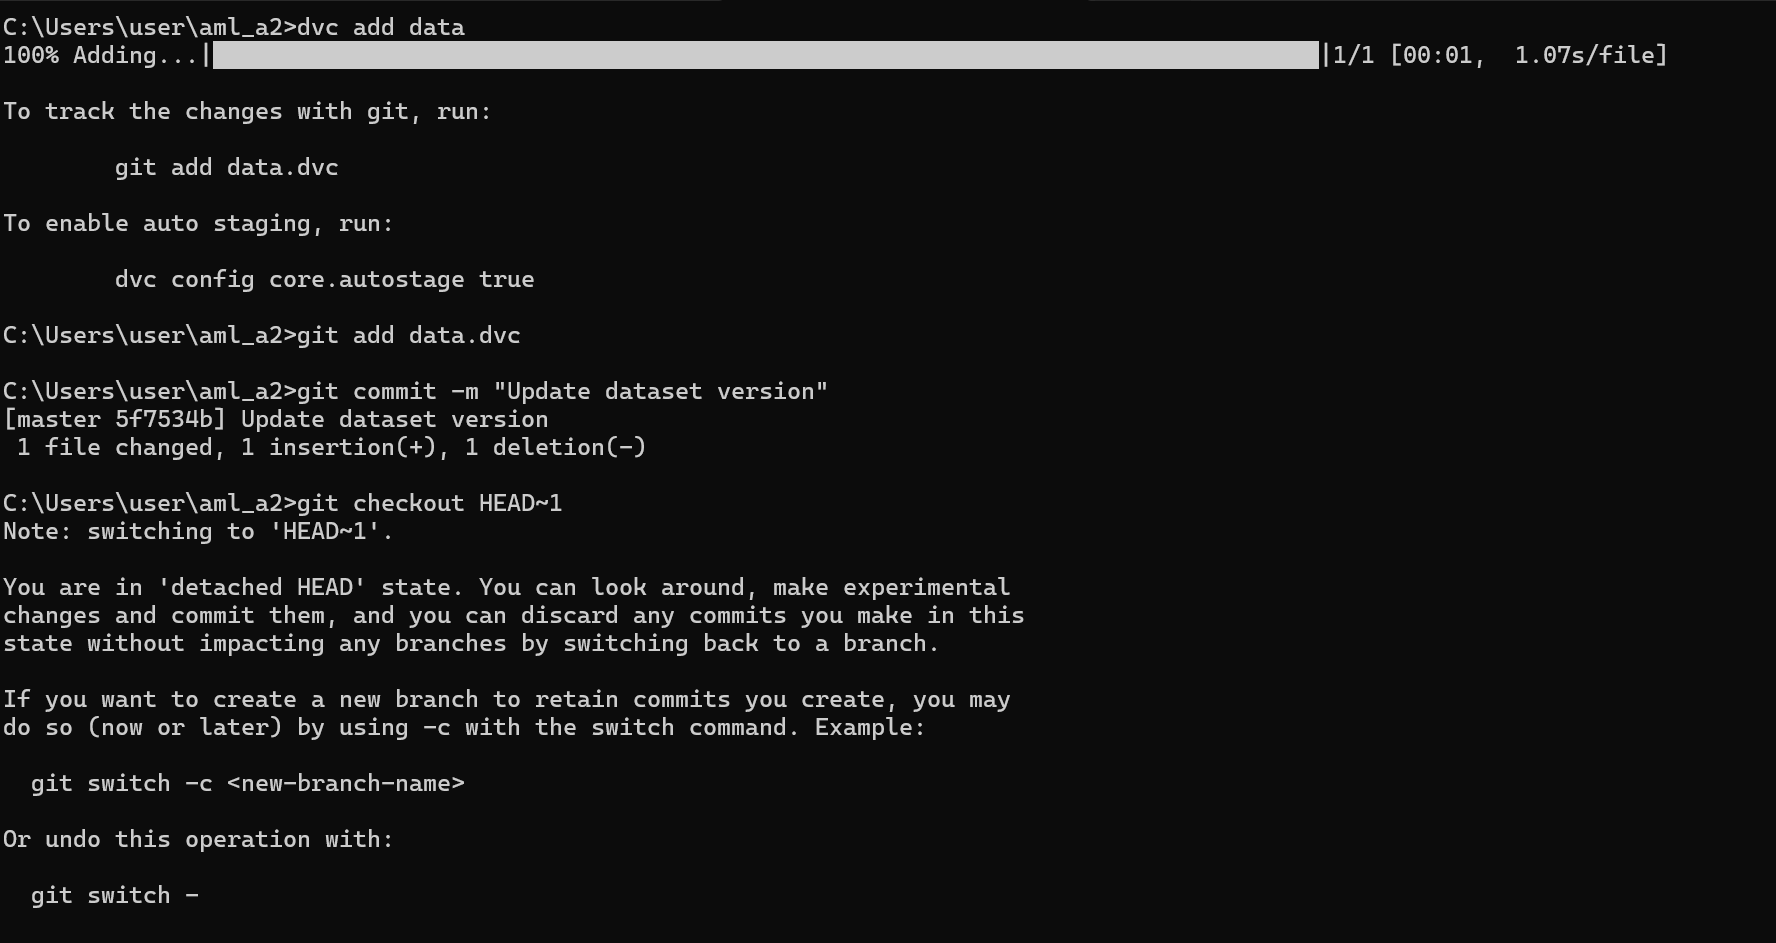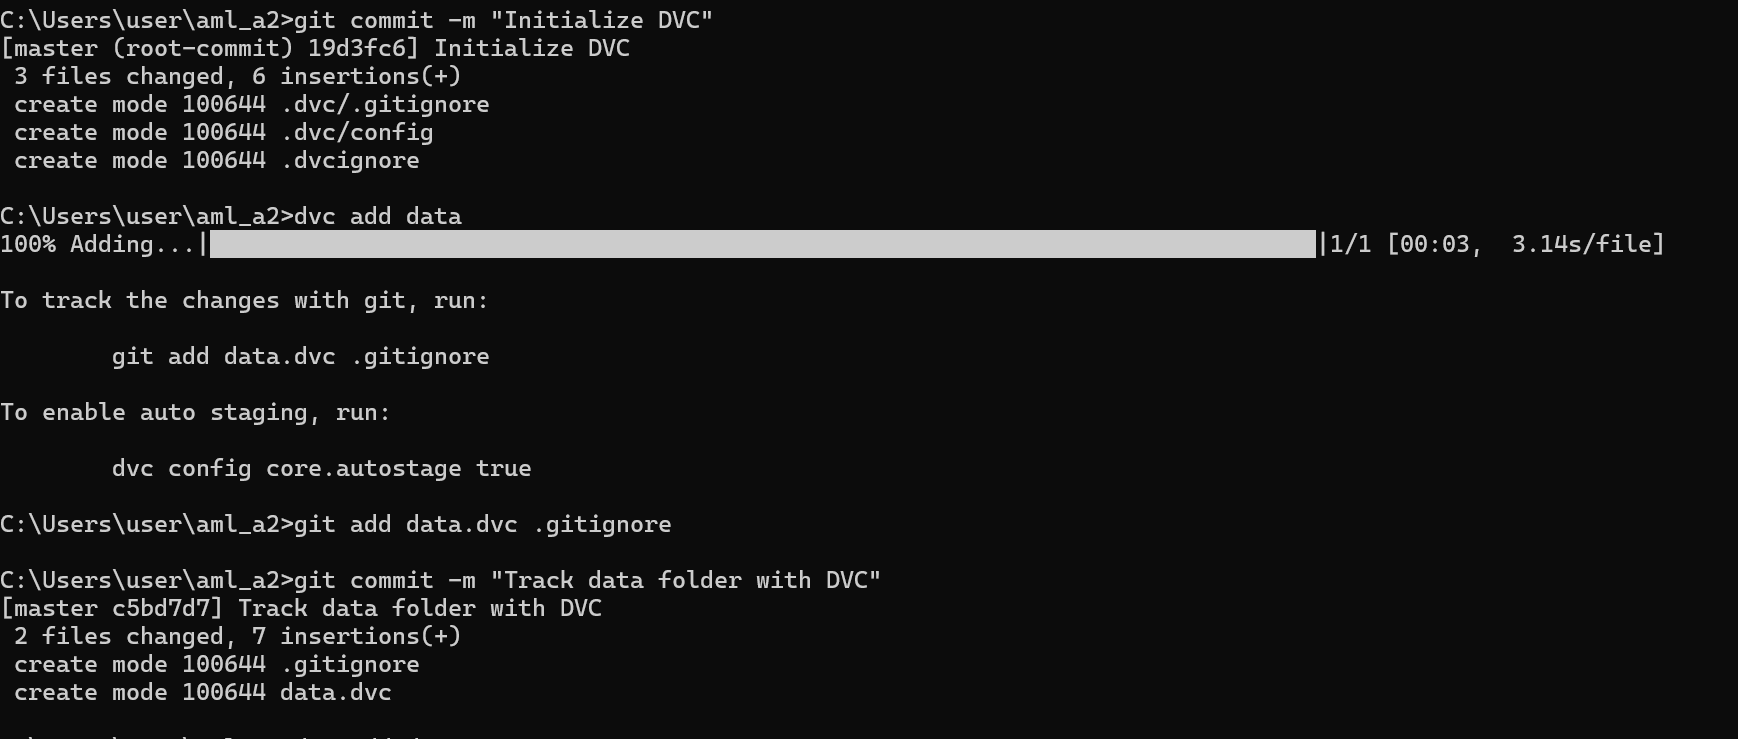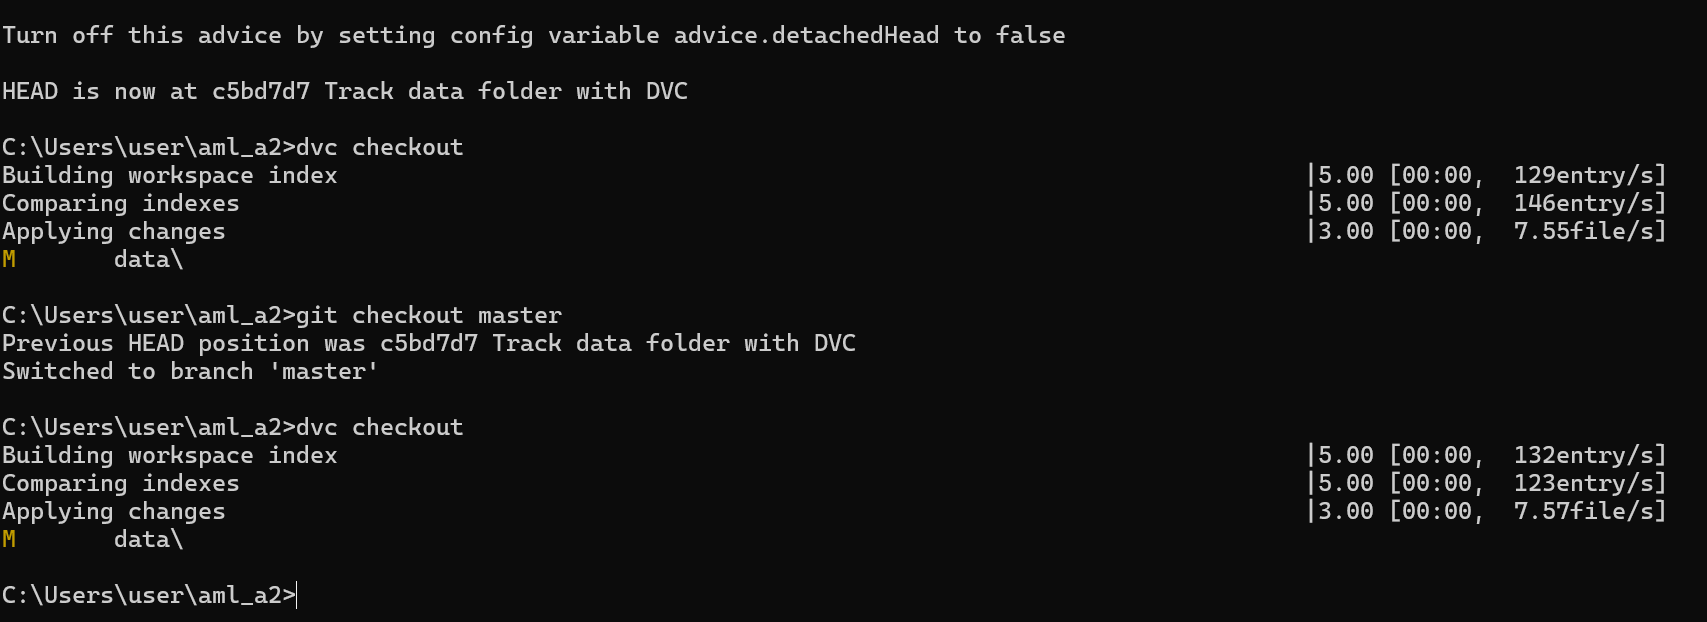

###Checking data distributions after checkouts

In [12]:
#function to load the data, drop na and convert spam label to 1 and ham label to 0

import pandas as pd

def load_splits(train_path, val_path, test_path, label_col="label", pos_label="spam"):
    # Load CSVs
    train = pd.read_csv(train_path)
    val   = pd.read_csv(val_path)
    test  = pd.read_csv(test_path)

    # Drop rows with NA anywhere (features or label)
    train = train.dropna()
    val   = val.dropna()
    test  = test.dropna()

    # Convert labels to binary
    def convert_labels(df):
        y = (df[label_col] == pos_label).astype(int)
        X = df.drop(columns=[label_col])
        return X, y

    X_train, y_train = convert_labels(train)
    X_val, y_val     = convert_labels(val)
    X_test, y_test   = convert_labels(test)

    return X_train, y_train, X_val, y_val, X_test, y_test


####Original version

In [13]:
X_train, y_train, X_val, y_val, X_test, y_test = load_splits("train_set.csv","validation_set.csv","test_set.csv")

In [15]:
y_train.value_counts()

,count
label,
0,3381
1,520


In [16]:
y_val.value_counts()

,count
label,
0,721
1,115


In [17]:
y_test.value_counts()

,count
label,
0,725
1,112


####Updated version

In [18]:
X_train1, y_train1, X_val1, y_val1, X_test1, y_test1 = load_splits("train_set.csv","validation_set.csv","test_set.csv")

In [19]:
y_train1.value_counts()

,count
label,
0,3368
1,533


In [20]:
y_val1.value_counts()

,count
label,
0,716
1,120


In [21]:
y_test1.value_counts()

,count
label,
0,743
1,94
